In [1]:
# GitHub repo installation of paddle
!python -m pip install paddlepaddle==2.0.0 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple


In [2]:
# Install paddle OCR
!pip install paddleocr

  Using cached pybind11-2.8.1-py2.py3-none-any.whl (208 kB)
  Using cached mccabe-0.6.1-py2.py3-none-any.whl (8.6 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Created wheel for fasttext: filename=fasttext-0.9.1-cp38-cp38-win_amd64.whl size=200238 sha256=c1b0e5a634779487188ce166b6b7574ce768c5f180ecf30ec0c718dda5b2acbb
  Stored in directory: c:\users\gilbe\appdata\local\pip\cache\wheels\70\de\57\385baa787dcec2e40c736288c39706cad2222e3c6027476128
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp38-cp38-win_amd64.whl size=83322 sha256=4258e9151dda921f885faad191209cc348d38c3c305a21bb0f20275aa2859c51
  Stored in directory: c:\users\gilbe\appdata\local\pip\cache\wheels\d7\0c\76\042b46eb0df65c3ccd0338f791210c55ab79d209bcc269e2c7
Successfully built fasttext python-Levenshtein
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.3.1
    Uninstalling Pillow-8.3.1:
      Successfully uninstalled Pillow-8.3.1
  Attempting uninstall: o

In [6]:
# Clone paddle OCR repo - get FONTS for visualization
!git clone https://github.com/PaddlePaddle/PaddleOCR

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [1]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation


In [5]:
# Setup model
ocr_model = PaddleOCR(lang='en')

[2021/11/22 13:47:50] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/11/22 13:47:50] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/11/22 13:47:50] root WARNING: version PP-OCRv2 not support cls models, auto switch to version PP-OCR
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\Gilbe/.paddleocr/2.3.0.2\\ocr\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\Gilbe/.paddleocr/2.3.0.2\\ocr\\det\\en\\en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_po

In [6]:
img_path = os.path.join('.', 'drug1.jpg')

In [7]:
# Run the ocr method on the ocr model
result = ocr_model.ocr(img_path)

[2021/11/22 13:47:53] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2021/11/22 13:47:55] root DEBUG: dt_boxes num : 14, elapse : 1.8019723892211914
[2021/11/22 13:47:56] root DEBUG: rec_res num  : 14, elapse : 0.8779881000518799


In [8]:
result

[[[[190.0, 127.0], [897.0, 127.0], [897.0, 165.0], [190.0, 165.0]],
  ('We areproud to offer all kinds of', 0.9823937)],
 [[[134.0, 180.0], [949.0, 180.0], [949.0, 217.0], [134.0, 217.0]],
  ('medicines and medical services at the', 0.9655899)],
 [[[378.0, 230.0], [708.0, 234.0], [707.0, 274.0], [378.0, 270.0]],
  ('cheapest prices', 0.9959247)],
 [[[253.0, 283.0], [830.0, 286.0], [830.0, 329.0], [253.0, 326.0]],
  ('in Turkey and export them', 0.98105985)],
 [[[350.0, 336.0], [724.0, 335.0], [725.0, 375.0], [350.0, 376.0]],
  ('all over the world', 0.97897786)],
 [[[144.0, 390.0], [938.0, 388.0], [938.0, 429.0], [144.0, 431.0]],
  ('For future inquiries andmore details', 0.9676748)],
 [[[161.0, 441.0], [974.0, 441.0], [974.0, 486.0], [161.0, 486.0]],
  ('please contact me directly anytime.', 0.97320765)],
 [[[246.0, 621.0], [312.0, 621.0], [312.0, 672.0], [246.0, 672.0]],
  ('X', 0.6329732)],
 [[[298.0, 622.0], [875.0, 620.0], [875.0, 658.0], [298.0, 660.0]],
  ('sales3@istanbulpharma

In [9]:
for res in result:
    print(res[1][0]) 

We areproud to offer all kinds of
medicines and medical services at the
cheapest prices
in Turkey and export them
all over the world
For future inquiries andmore details
please contact me directly anytime.
X
sales3@istanbulpharma.com.tr
0D
0090 542 68989 03
www.istanbulpharma.com.tr
Thanks in advance
HrO


In [10]:
# Extracting detected components
boxes = [res[0] for res in result] # 
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [11]:
# Specifying font path for draw_ocr method
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [12]:
# Import our image - drug 1/2/3
# imports image
img = cv2.imread(img_path) 

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

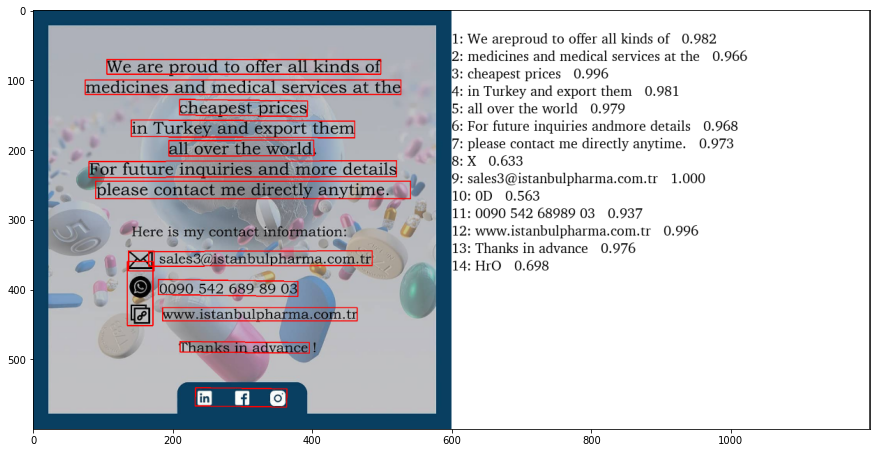

In [13]:
# Visualize our image and detections
# resizing display area
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

# show the image using matplotlib
plt.imshow(annotated) 

In [14]:
img.shape

(1080, 1080, 3)